<center>
<table>
    <tr>
        <td>
            <img src="IISERB_new_logo_updated_2022.png" alt="Institute Logo" width="100">
        </td>
        <td>
            <center>
            <h1><b>Data Science in Practice - DSE 315</b></h1>
            </center>
            <h2><b>Predict Wine Quality using Machine learning with Python</b></h2>
            <center>
            <h4><b>Nikunj Indoriya[22221], Aditya Dandhare[22019]</b></h4>
            </center>
        </td>
    </tr>
</table>
</center>

In [18]:
# ===========================
# Libraries and Setup
# ===========================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# For consistent plots
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams["figure.figsize"] = (10, 6)


In [19]:
# ===========================
# Data Loading
# ===========================
x_train = pd.read_csv('x_train.csv')
y_train = pd.read_csv('y_train.csv')

# Combine into single dataframe
wine_train_df = pd.concat([x_train, y_train], axis=1)
wine_train_df.to_csv('wine_train.csv', index=False)

print("Dataset Overview:")
print(wine_train_df.info())
print("\nMissing Values:\n", wine_train_df.isnull().sum())
wine_train_df.head()
# ===========================

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1279 entries, 0 to 1278
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1279 non-null   float64
 1   volatile acidity      1279 non-null   float64
 2   citric acid           1279 non-null   float64
 3   residual sugar        1279 non-null   float64
 4   chlorides             1279 non-null   float64
 5   free sulfur dioxide   1279 non-null   float64
 6   total sulfur dioxide  1279 non-null   float64
 7   density               1279 non-null   float64
 8   pH                    1279 non-null   float64
 9   sulphates             1279 non-null   float64
 10  alcohol               1279 non-null   float64
 11  quality               1279 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 120.0 KB
None

Missing Values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residua

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6,6
1,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,6
2,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8,6
3,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4,5
4,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9,5


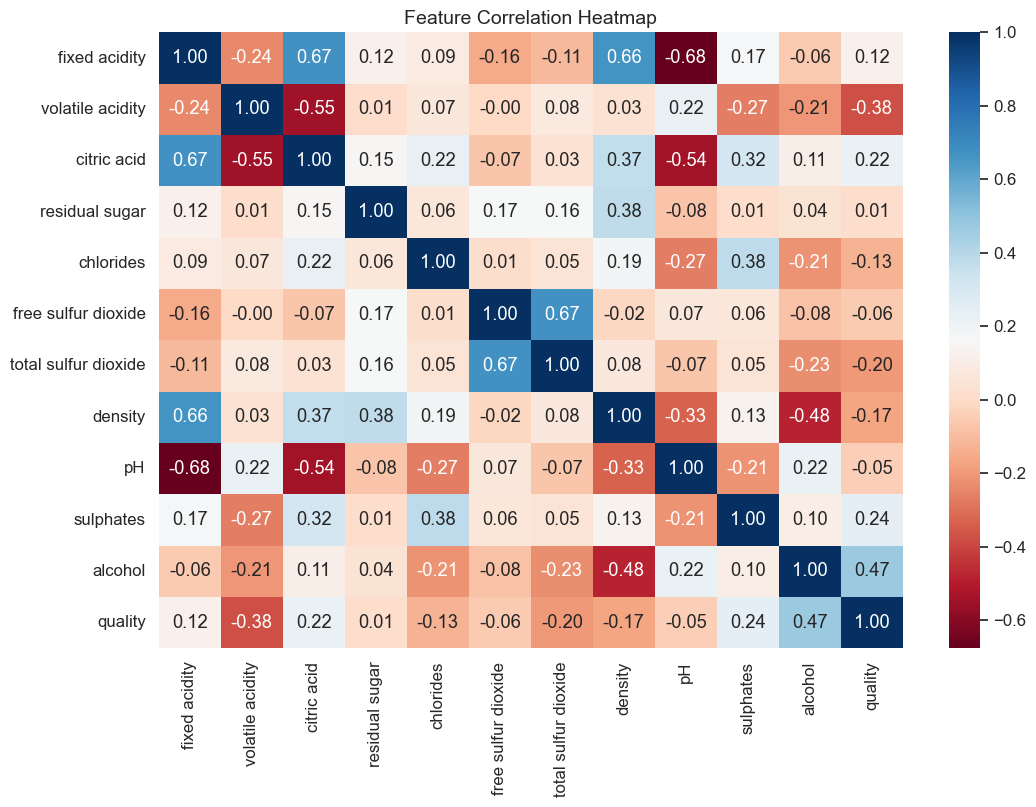

In [20]:
# ===========================
# Correlation Heatmap
# ===========================
corr = wine_train_df.corr(method="pearson")
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu", cbar=True)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()


In [21]:
# ===========================
# Quality Categorization
# ===========================
conditions = [
    (wine_train_df['quality'] <= 5),
    (wine_train_df['quality'].between(6, 7)),
    (wine_train_df['quality'] > 7)
]
choices = ['low', 'medium', 'high']
wine_train_df['quality_mark'] = np.select(conditions, choices, default='medium')

wine_train_df[['quality', 'quality_mark']].head()


,quality,quality_mark
0,6,medium
1,6,medium
2,6,medium
3,5,low
4,5,low


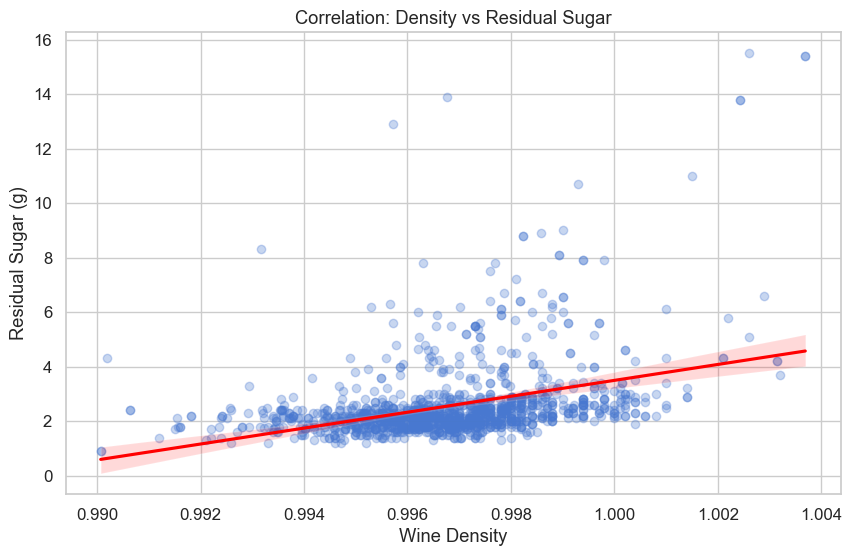

Pearson correlation: 0.377, p-value: 1.472e-44


In [22]:
# ===========================
# Pearson Correlation Example
# ===========================
sns.regplot(x="density", y="residual sugar", data=wine_train_df,
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.xlabel("Wine Density")
plt.ylabel("Residual Sugar (g)")
plt.title("Correlation: Density vs Residual Sugar")
plt.show()

corr, p_val = stats.pearsonr(wine_train_df["density"], wine_train_df["residual sugar"])
print(f"Pearson correlation: {corr:.3f}, p-value: {p_val:.3e}")


Quality low: Pearson correlation = 0.411, p-value = 6.006e-26


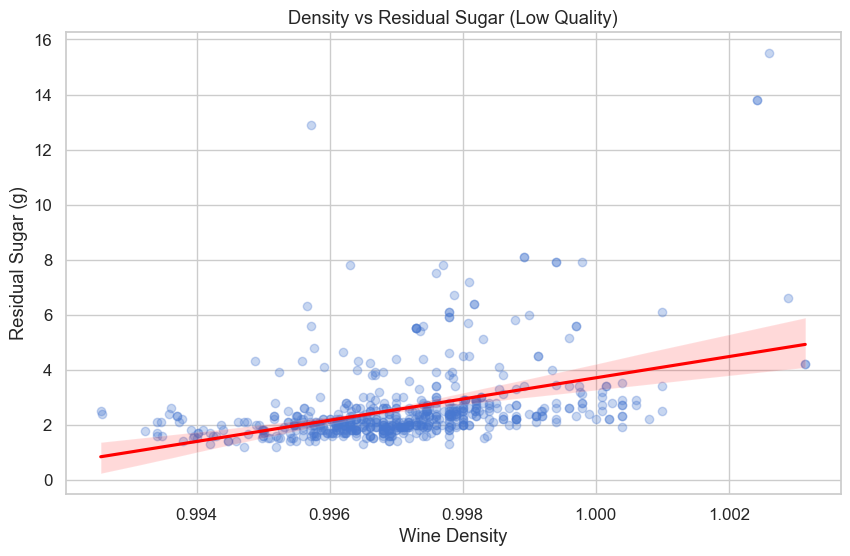

Quality medium: Pearson correlation = 0.362, p-value = 6.042e-22


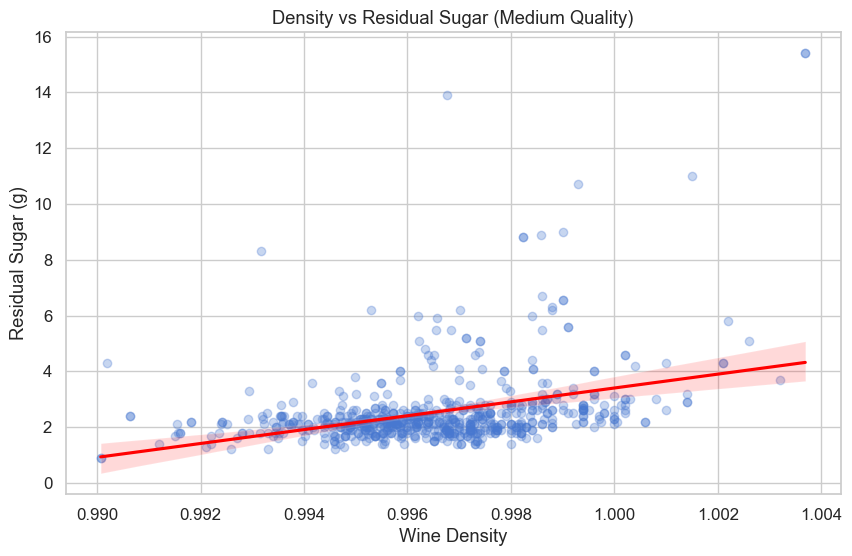

Quality high: Pearson correlation = 0.641, p-value = 1.820e-02


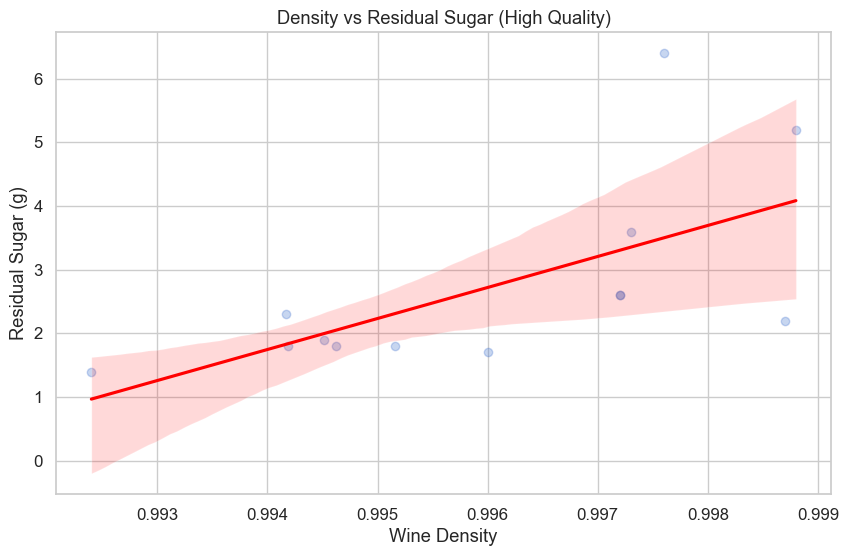

In [23]:
# ===========================
# Correlations by Quality Category
# ===========================
for category in ['low', 'medium', 'high']:
    subset = wine_train_df[wine_train_df['quality_mark'] == category]
    corr, p_val = stats.pearsonr(subset["density"], subset["residual sugar"])
    print(f"Quality {category}: Pearson correlation = {corr:.3f}, p-value = {p_val:.3e}")

    sns.regplot(x="density", y="residual sugar", data=subset,
                scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    plt.xlabel("Wine Density")
    plt.ylabel("Residual Sugar (g)")
    plt.title(f"Density vs Residual Sugar ({category.capitalize()} Quality)")
    plt.show()


Frequency distribution of wine quality (%):
quality
3     0.70
4     3.36
5    43.08
6    39.56
7    12.28
8     1.02
Name: proportion, dtype: float64


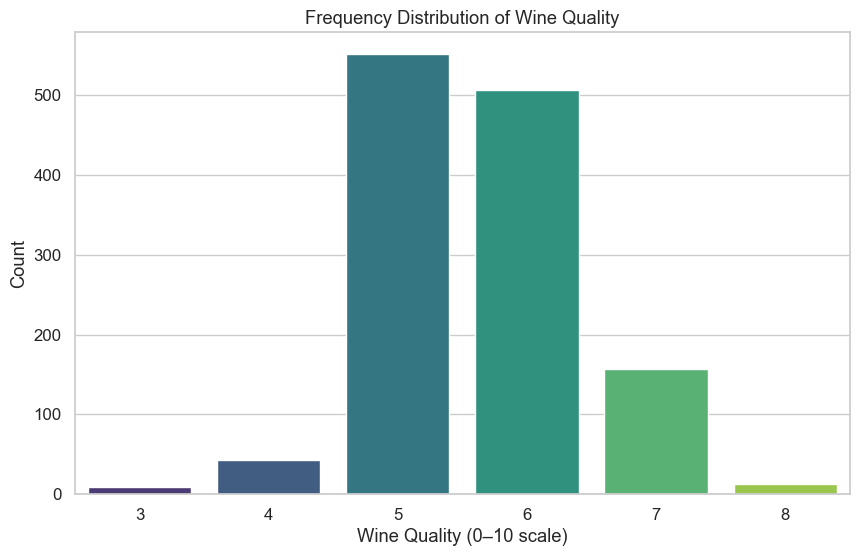

In [24]:
# ===========================
# Frequency Distribution of Quality
# ===========================
freq_dist = wine_train_df["quality"].value_counts(normalize=True).sort_index() * 100
print("Frequency distribution of wine quality (%):")
print(freq_dist.round(2))

sns.countplot(x="quality", data=wine_train_df, palette="viridis")
plt.xlabel("Wine Quality (0–10 scale)")
plt.ylabel("Count")
plt.title("Frequency Distribution of Wine Quality")
plt.show()


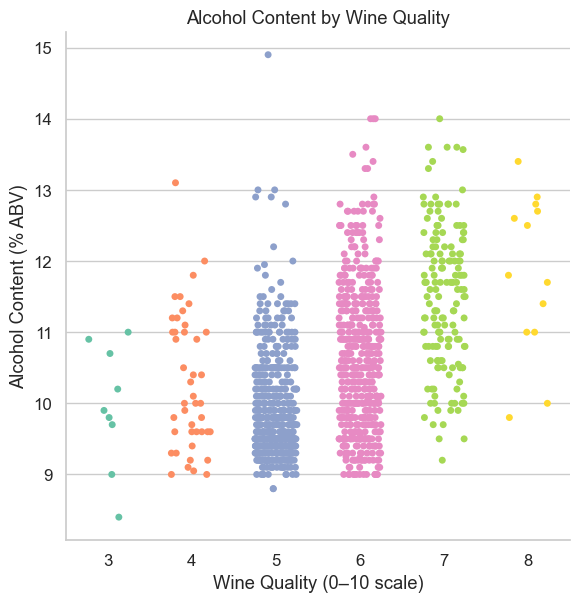

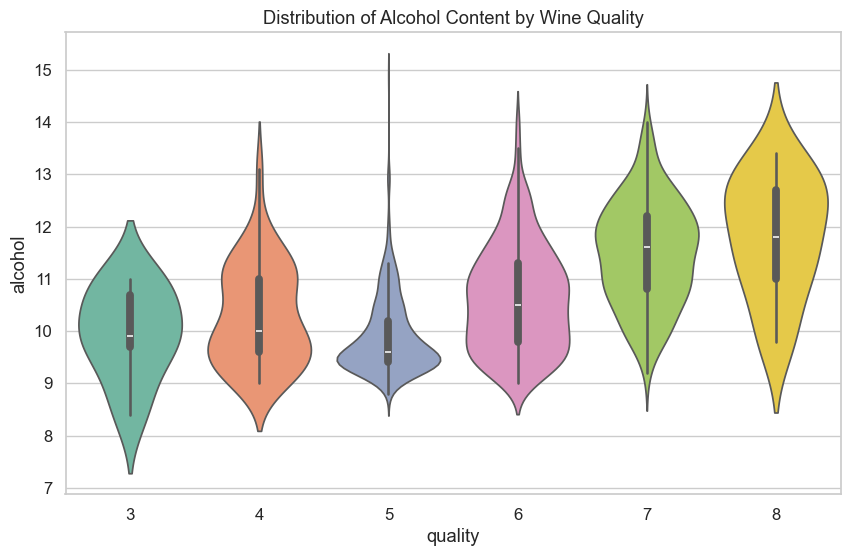

In [25]:
# ===========================
# Alcohol vs Quality
# ===========================
sns.catplot(x="quality", y="alcohol", data=wine_train_df,
            kind="strip", jitter=0.25, palette="Set2", height=6)
plt.xlabel("Wine Quality (0–10 scale)")
plt.ylabel("Alcohol Content (% ABV)")
plt.title("Alcohol Content by Wine Quality")
plt.show()

sns.violinplot(x="quality", y="alcohol", data=wine_train_df, palette="Set2")
plt.title("Distribution of Alcohol Content by Wine Quality")
plt.show()


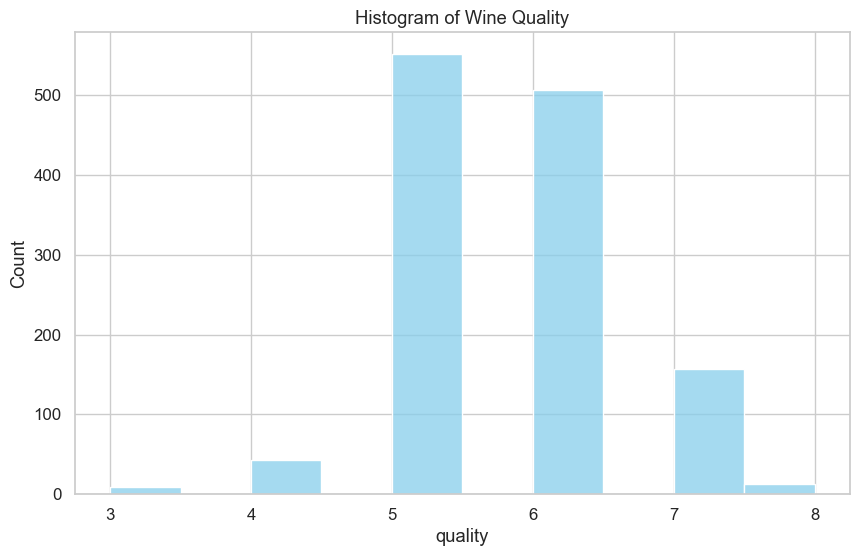

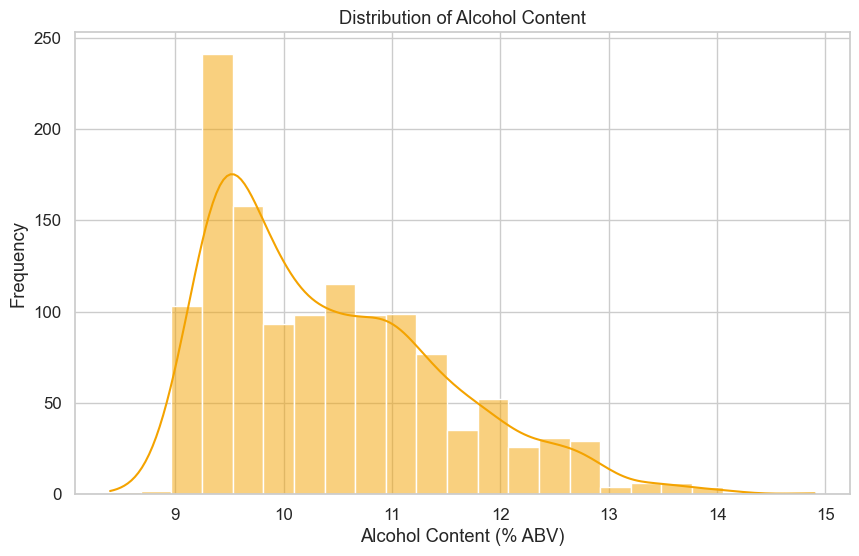

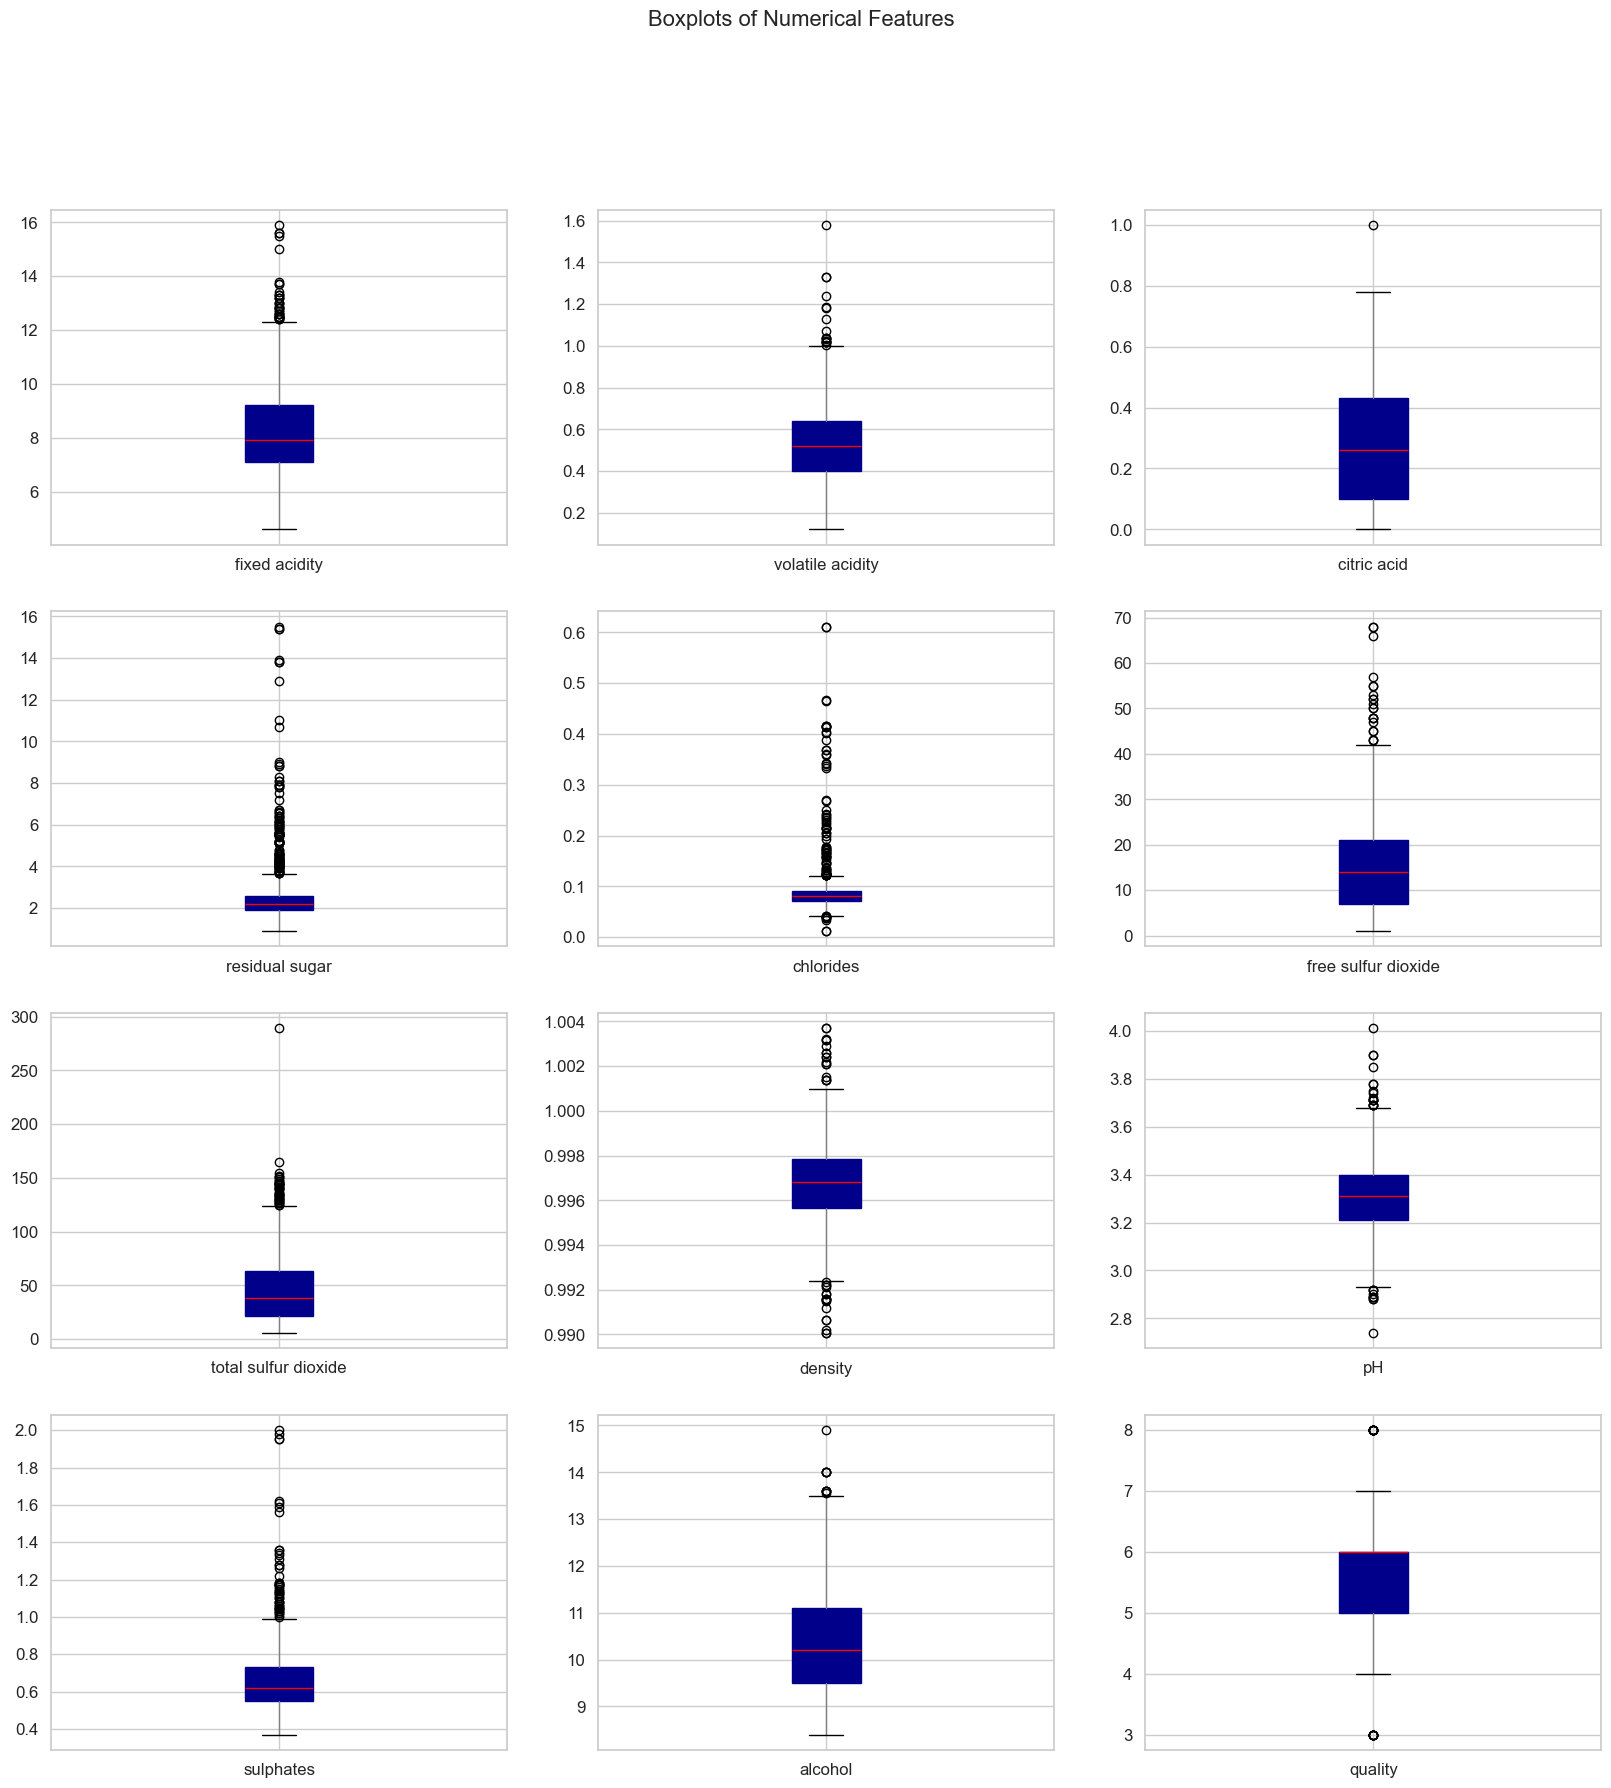

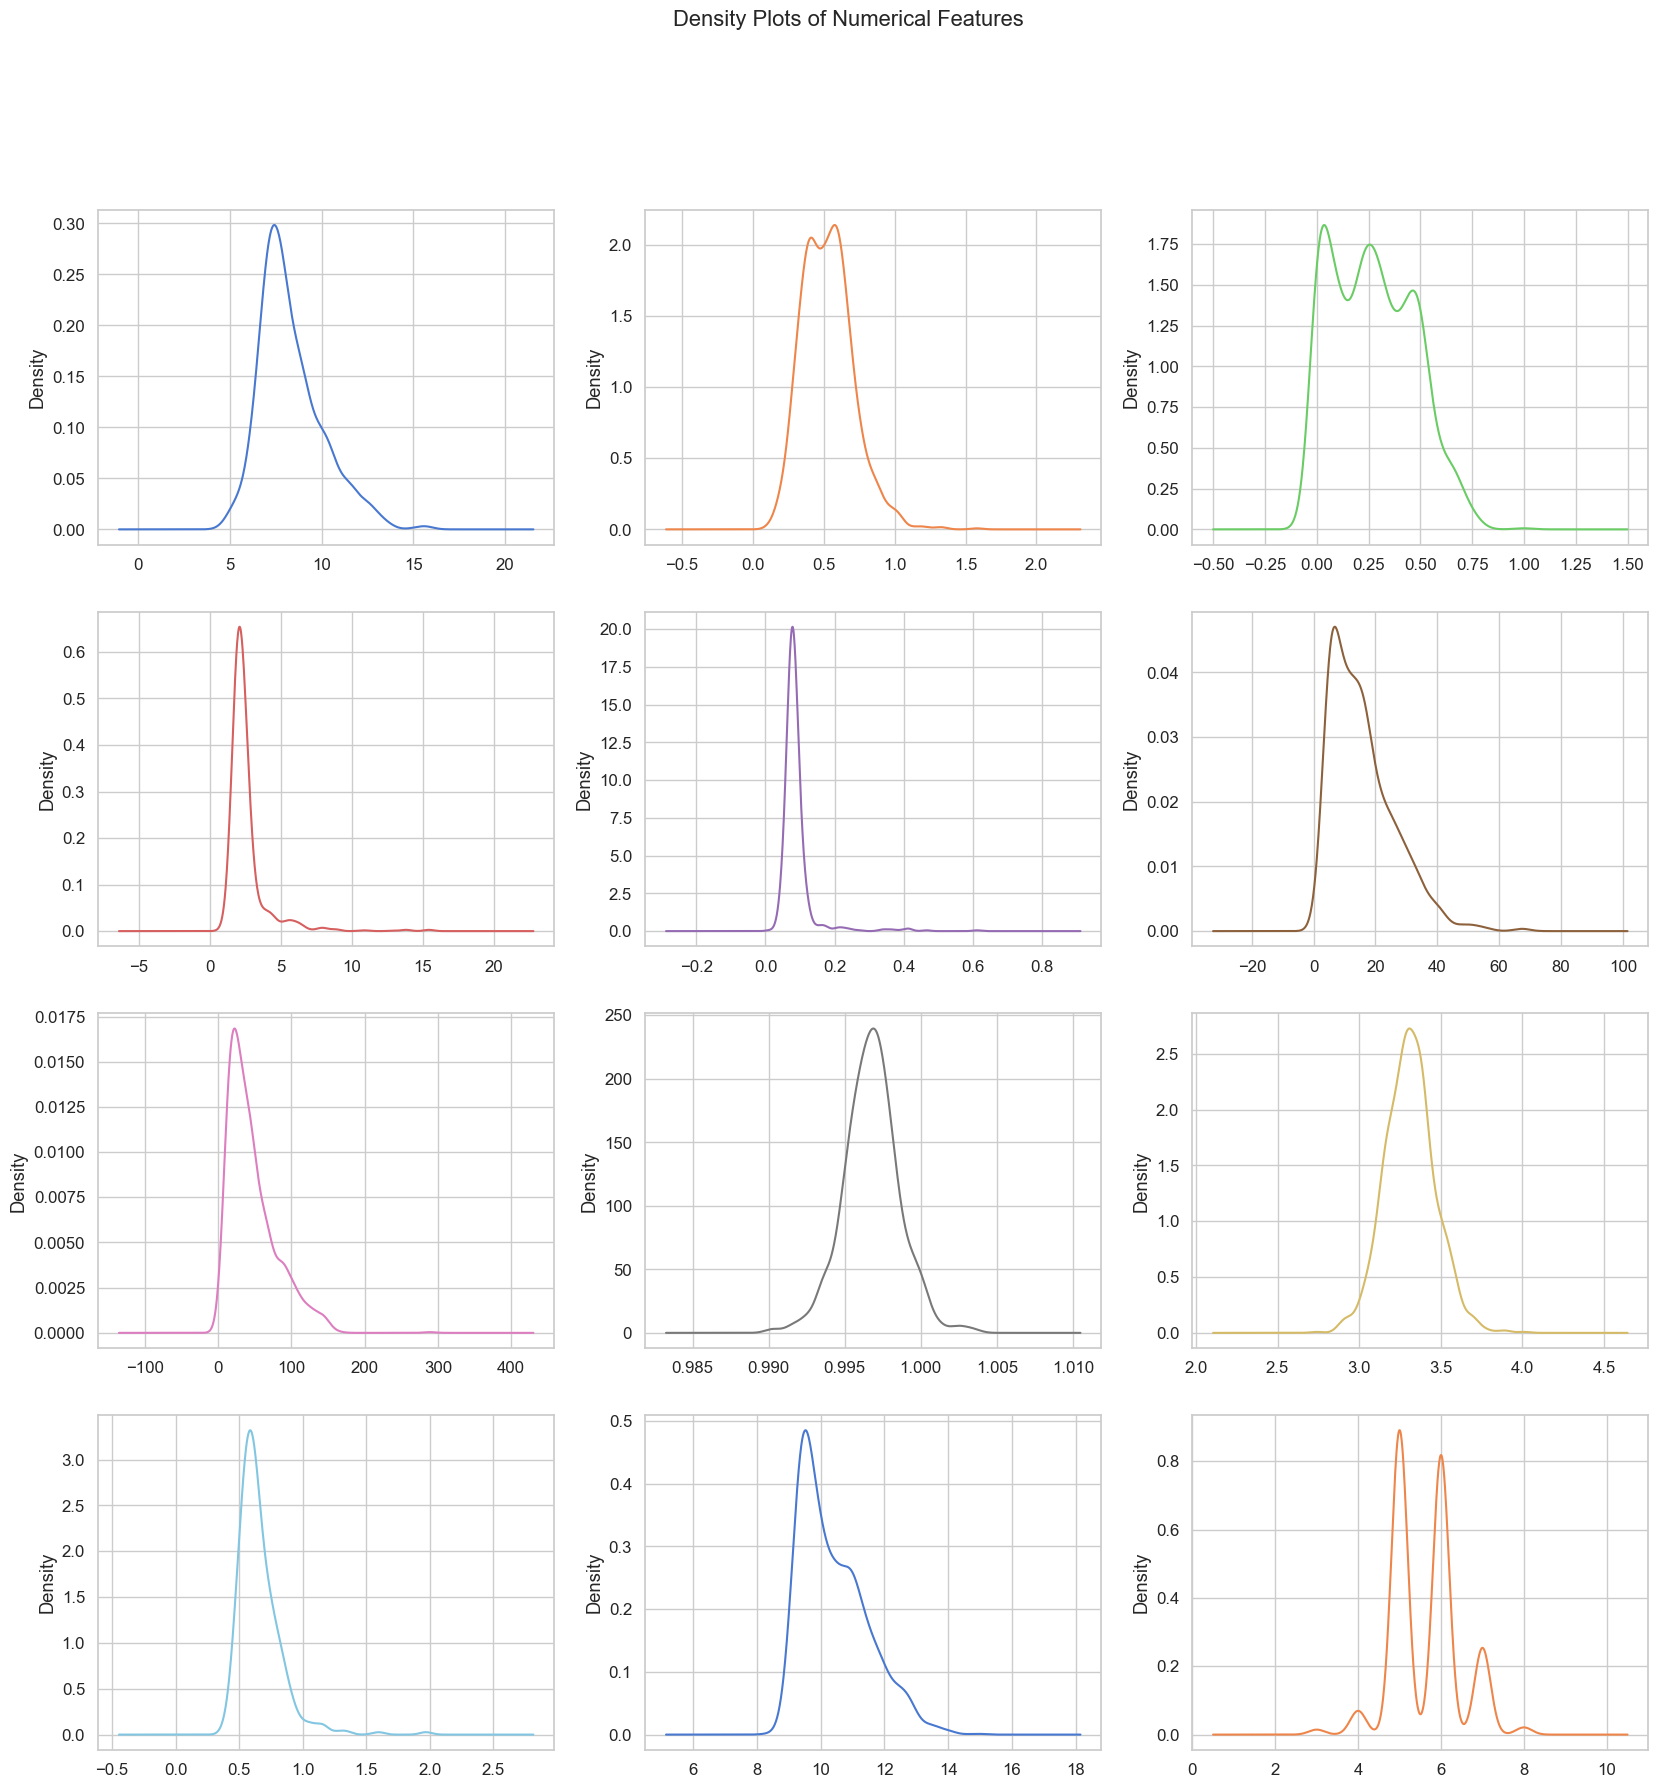

In [26]:
# ===========================
# Distribution Plots
# ===========================
sns.histplot(x='quality', data=wine_train_df, bins=10, kde=False, color="skyblue")
plt.title("Histogram of Wine Quality")
plt.show()

sns.histplot(wine_train_df['alcohol'], kde=True, color='#F4A300')
plt.xlabel("Alcohol Content (% ABV)")
plt.ylabel("Frequency")
plt.title("Distribution of Alcohol Content")
plt.show()

wine_train_df.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False,
        figsize=(20,20),
        color=dict(boxes='DarkBlue', whiskers='Gray', medians='Red', caps='Black'),
        patch_artist=True)
plt.suptitle("Boxplots of Numerical Features")
plt.show()

wine_train_df.plot(kind='density', subplots=True, layout=(4,3), figsize=(20,20),
        sharex=False, sharey=False, legend=False)
plt.suptitle("Density Plots of Numerical Features")
plt.show()


In [28]:
# ============================
# Imports & Visualization Setup
# ============================
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tabulate import tabulate

# sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, roc_auc_score, classification_report
)
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Silence warnings for neat output
import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid", font_scale=1.0)
plt.rcParams["figure.figsize"] = (8, 5)


In [29]:
# ============================
# Helper utilities
# ============================

def compute_metrics(y_true, y_pred, y_score=None):
    """Return a dict of common metrics. y_score is probability or score for ROC-AUC."""
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    roc_auc = None
    if y_score is not None:
        try:
            roc_auc = roc_auc_score(y_true, y_score)
        except Exception:
            roc_auc = None
    return {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1, "ROC_AUC": roc_auc}

def plot_confusion(cm, title="Confusion Matrix", labels=['Low','High']):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [30]:
# ============================
# Prepare data - binary mapping (same as original code)
# ============================
# wine_train_df must exist from your EDA cells
df = wine_train_df.copy()   # keep original safe

# Recode used by most functions in your original code
recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
df['quality_c'] = df['quality'].map(recode)

# Features (all columns except 'quality' and 'quality_c') and target
X = df.drop(columns=['quality', 'quality_c'])
y = df['quality_c']

# Train / Test split (matching original functions' usage of test_size=0.4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

print("Shapes: X_train:", X_train.shape, "X_test:", X_test.shape, "y_train:", y_train.shape, "y_test:", y_test.shape)


Shapes: X_train: (767, 12) X_test: (512, 12) y_train: (767,) y_test: (512,)


----- Logistic Regression -----
+---+--------------+--------------------+
|   |    Metric    |       Value        |
+---+--------------+--------------------+
| 0 |   Accuracy   |    0.716796875     |
| 1 |  Precision   | 0.7333333333333333 |
| 2 |    Recall    | 0.6848249027237354 |
| 3 |      F1      | 0.7082494969818913 |
| 4 |   ROC_AUC    | 0.7975051499198901 |
| 5 | TrainTime(s) |       0.036        |
+---+--------------+--------------------+

Classification Report:

              precision    recall  f1-score   support

           0       0.70      0.75      0.72       255
           1       0.73      0.68      0.71       257

    accuracy                           0.72       512
   macro avg       0.72      0.72      0.72       512
weighted avg       0.72      0.72      0.72       512



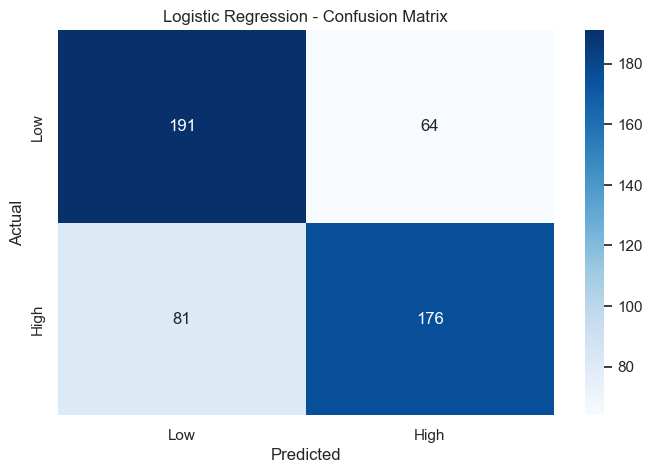

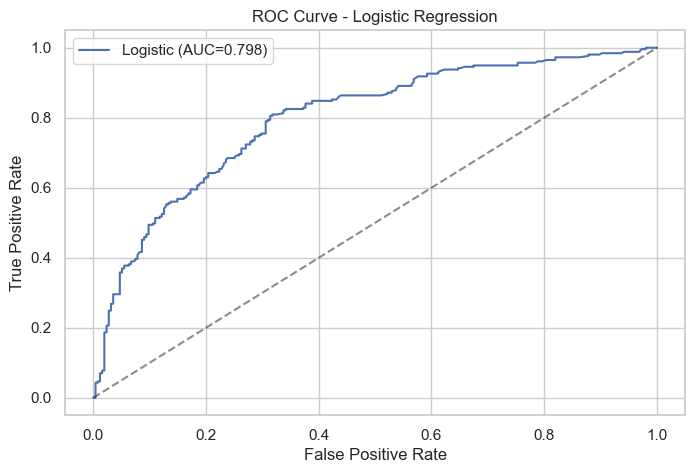

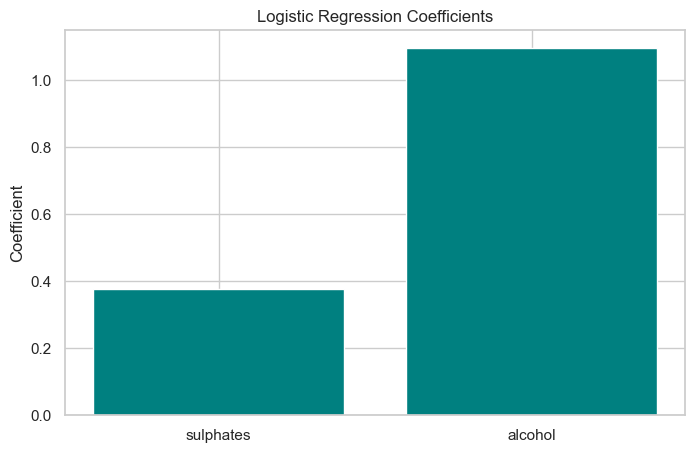

In [32]:
# ============================
# Logistic Regression (same variable choice as original)
# ============================
print("----- Logistic Regression -----")
# Use same predictors as original function
predictors = ["sulphates", "alcohol"]
X_lr = df[predictors]
y_lr = df['quality_c']

# split (original used test_size=0.4)
Xtr, Xte, ytr, yte = train_test_split(X_lr, y_lr, test_size=0.4, random_state=42)

# scale
scaler_lr = StandardScaler()
Xtr_s = scaler_lr.fit_transform(Xtr)
Xte_s = scaler_lr.transform(Xte)

clf = LogisticRegression(max_iter=1000)
t0 = time.time()
clf.fit(Xtr_s, ytr)
t_training = time.time() - t0

y_pred = clf.predict(Xte_s)
y_score = clf.predict_proba(Xte_s)[:,1]

metrics_lr = compute_metrics(yte, y_pred, y_score)
metrics_lr["TrainTime(s)"] = round(t_training, 3)

# Print metrics nicely
print(tabulate(pd.DataFrame(list(metrics_lr.items()), columns=["Metric","Value"]), tablefmt="pretty", headers="keys"))
print("\nClassification Report:\n")
print(classification_report(yte, y_pred, zero_division=0))

# Confusion matrix
cm = confusion_matrix(yte, y_pred)
plot_confusion(cm, title="Logistic Regression - Confusion Matrix")

# ROC curve
fpr, tpr, _ = roc_curve(yte, y_score)
roc_auc = roc_auc_score(yte, y_score)
plt.plot(fpr, tpr, label=f'Logistic (AUC={roc_auc:.3f})')
plt.plot([0,1],[0,1],'k--', alpha=0.5)
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate"); plt.legend(); plt.show()

# Coefficients plot
coeffs = clf.coef_[0]
plt.bar(predictors, coeffs, color='teal')
plt.title("Logistic Regression Coefficients")
plt.ylabel("Coefficient")
plt.show()


----- Decision Tree -----
+---+--------------+--------------------+
|   |    Metric    |       Value        |
+---+--------------+--------------------+
| 0 |   Accuracy   |      0.65625       |
| 1 |  Precision   |        0.68        |
| 2 |    Recall    | 0.5953307392996109 |
| 3 |      F1      | 0.6348547717842323 |
| 4 |   ROC_AUC    | 0.6759365224689098 |
| 5 | TrainTime(s) |       0.018        |
+---+--------------+--------------------+

Classification Report:

              precision    recall  f1-score   support

           0       0.64      0.72      0.68       255
           1       0.68      0.60      0.63       257

    accuracy                           0.66       512
   macro avg       0.66      0.66      0.66       512
weighted avg       0.66      0.66      0.65       512



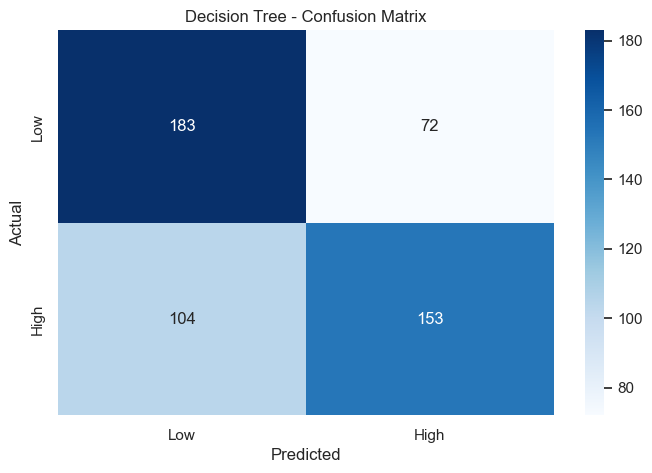

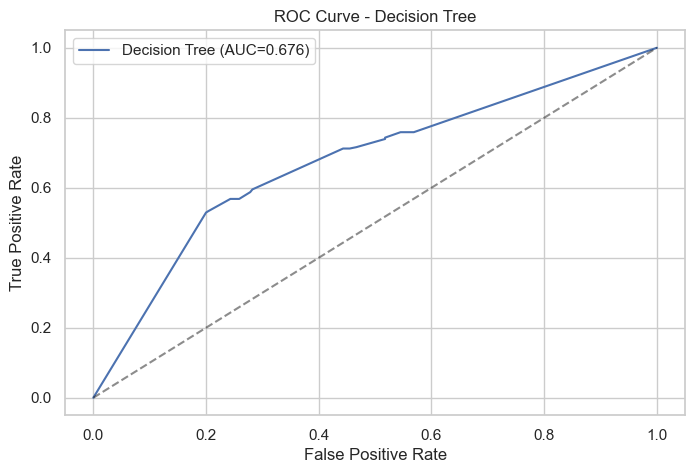

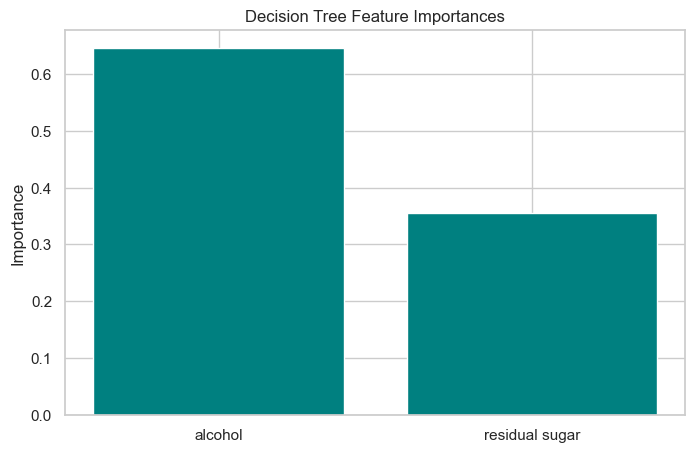

In [33]:
# ============================
# Decision Tree
# ============================
print("----- Decision Tree -----")
predictors_dt = ["residual sugar", "alcohol"]
X_dt = df[predictors_dt]
y_dt = df['quality_c']
Xtr, Xte, ytr, yte = train_test_split(X_dt, y_dt, test_size=0.4, random_state=42)

clf_dt = DecisionTreeClassifier(random_state=42)
t0 = time.time()
clf_dt.fit(Xtr, ytr)
t_training = time.time() - t0

y_pred = clf_dt.predict(Xte)
# get probability for ROC
y_score = clf_dt.predict_proba(Xte)[:,1]

metrics_dt = compute_metrics(yte, y_pred, y_score)
metrics_dt["TrainTime(s)"] = round(t_training, 3)
print(tabulate(pd.DataFrame(list(metrics_dt.items()), columns=["Metric","Value"]), tablefmt="pretty", headers="keys"))
print("\nClassification Report:\n")
print(classification_report(yte, y_pred, zero_division=0))

cm = confusion_matrix(yte, y_pred)
plot_confusion(cm, title="Decision Tree - Confusion Matrix")

# ROC
fpr, tpr, _ = roc_curve(yte, y_score)
roc_auc = roc_auc_score(yte, y_score)
plt.plot(fpr, tpr, label=f'Decision Tree (AUC={roc_auc:.3f})')
plt.plot([0,1],[0,1],'k--', alpha=0.5)
plt.title("ROC Curve - Decision Tree")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate"); plt.legend(); plt.show()

# Feature importances
feat_imp = pd.Series(clf_dt.feature_importances_, index=predictors_dt).sort_values(ascending=False)
plt.bar(feat_imp.index, feat_imp.values, color='teal')
plt.title("Decision Tree Feature Importances")
plt.ylabel("Importance")
plt.show()


----- K-Nearest Neighbors -----
+---+--------------+--------------------+
|   |    Metric    |       Value        |
+---+--------------+--------------------+
| 0 |   Accuracy   |    0.646484375     |
| 1 |  Precision   | 0.6583333333333333 |
| 2 |    Recall    | 0.6147859922178989 |
| 3 |      F1      | 0.635814889336016  |
| 4 |   ROC_AUC    | 0.7264286259250783 |
| 5 | TrainTime(s) |       0.012        |
+---+--------------+--------------------+

Classification Report:

              precision    recall  f1-score   support

           0       0.64      0.68      0.66       255
           1       0.66      0.61      0.64       257

    accuracy                           0.65       512
   macro avg       0.65      0.65      0.65       512
weighted avg       0.65      0.65      0.65       512



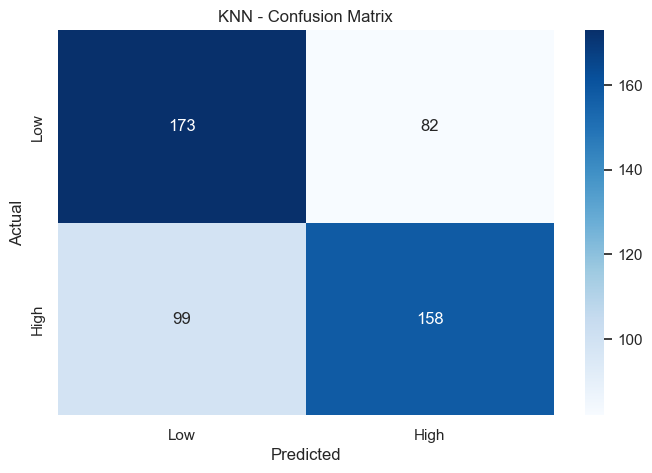

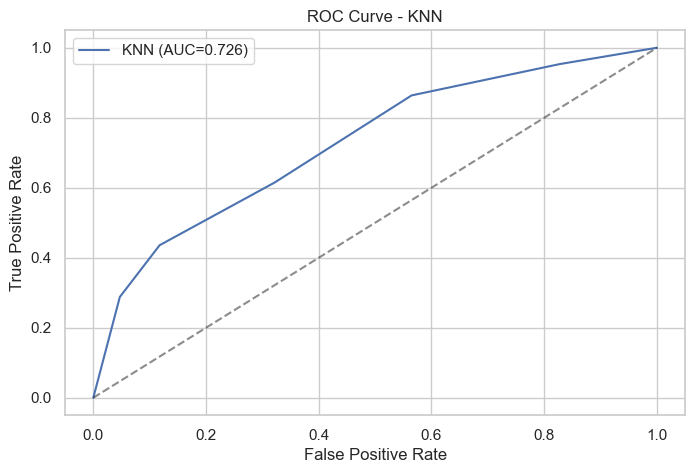

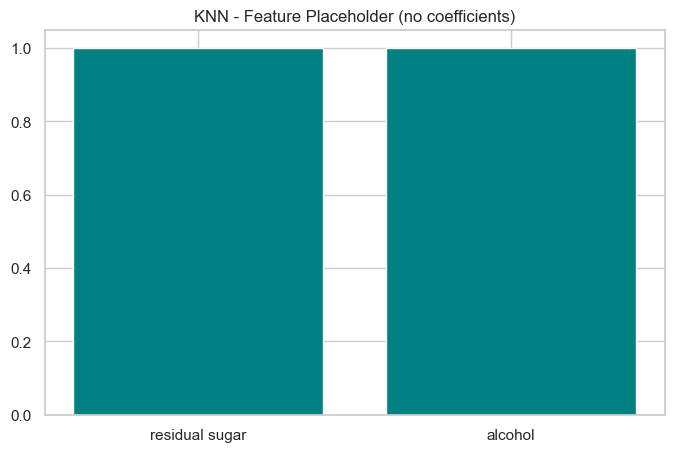

In [34]:
# ============================
# K-Nearest Neighbors
# ============================
print("----- K-Nearest Neighbors -----")
predictors_knn = ["residual sugar", "alcohol"]
X_knn = df[predictors_knn]
y_knn = df['quality_c']
Xtr, Xte, ytr, yte = train_test_split(X_knn, y_knn, test_size=0.4, random_state=42)

# KNN benefits from scaling
scaler_knn = StandardScaler()
Xtr_s = scaler_knn.fit_transform(Xtr)
Xte_s = scaler_knn.transform(Xte)

clf_knn = KNeighborsClassifier()
t0 = time.time()
clf_knn.fit(Xtr_s, ytr)
t_training = time.time() - t0

y_pred = clf_knn.predict(Xte_s)
y_score = clf_knn.predict_proba(Xte_s)[:,1]

metrics_knn = compute_metrics(yte, y_pred, y_score)
metrics_knn["TrainTime(s)"] = round(t_training, 3)
print(tabulate(pd.DataFrame(list(metrics_knn.items()), columns=["Metric","Value"]), tablefmt="pretty", headers="keys"))
print("\nClassification Report:\n")
print(classification_report(yte, y_pred, zero_division=0))

cm = confusion_matrix(yte, y_pred)
plot_confusion(cm, title="KNN - Confusion Matrix")

# ROC
fpr, tpr, _ = roc_curve(yte, y_score)
roc_auc = roc_auc_score(yte, y_score)
plt.plot(fpr, tpr, label=f'KNN (AUC={roc_auc:.3f})')
plt.plot([0,1],[0,1],'k--', alpha=0.5)
plt.title("ROC Curve - KNN")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate"); plt.legend(); plt.show()

# KNN has no coefficients; show placeholder bar
plt.bar(predictors_knn, [1,1], color='teal')
plt.title("KNN - Feature Placeholder (no coefficients)")
plt.show()


----- Naive Bayes (Gaussian, Multinomial, Bernoulli) -----

-- GaussianNB --
+---+-----------+--------------------+
|   |  Metric   |       Value        |
+---+-----------+--------------------+
| 0 | Accuracy  |      0.734375      |
| 1 | Precision | 0.7372549019607844 |
| 2 |  Recall   | 0.7315175097276264 |
| 3 |    F1     |      0.734375      |
| 4 |  ROC_AUC  | 0.7825284199282827 |
| 5 |   Model   |     GaussianNB     |
+---+-----------+--------------------+

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.74      0.73       255
           1       0.74      0.73      0.73       257

    accuracy                           0.73       512
   macro avg       0.73      0.73      0.73       512
weighted avg       0.73      0.73      0.73       512



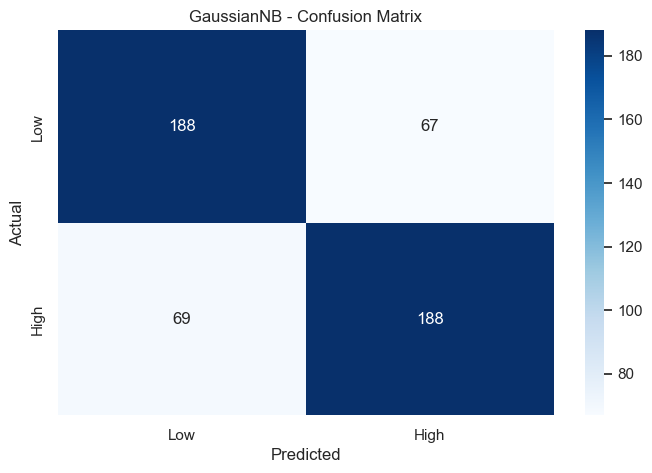


-- MultinomialNB --
+---+-----------+--------------------+
|   |  Metric   |       Value        |
+---+-----------+--------------------+
| 0 | Accuracy  |     0.59765625     |
| 1 | Precision | 0.580952380952381  |
| 2 |  Recall   | 0.7120622568093385 |
| 3 |    F1     | 0.6398601398601399 |
| 4 |  ROC_AUC  | 0.633524071107042  |
| 5 |   Model   |   MultinomialNB    |
+---+-----------+--------------------+

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.48      0.54       255
           1       0.58      0.71      0.64       257

    accuracy                           0.60       512
   macro avg       0.60      0.60      0.59       512
weighted avg       0.60      0.60      0.59       512



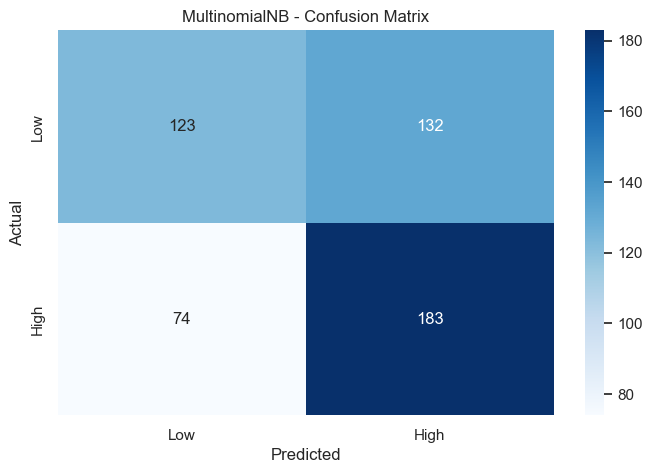


-- BernoulliNB --
+---+-----------+--------------------+
|   |  Metric   |       Value        |
+---+-----------+--------------------+
| 0 | Accuracy  |    0.501953125     |
| 1 | Precision |    0.501953125     |
| 2 |  Recall   |        1.0         |
| 3 |    F1     | 0.6684005201560468 |
| 4 |  ROC_AUC  | 0.5140001525902189 |
| 5 |   Model   |    BernoulliNB     |
+---+-----------+--------------------+

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       255
           1       0.50      1.00      0.67       257

    accuracy                           0.50       512
   macro avg       0.25      0.50      0.33       512
weighted avg       0.25      0.50      0.34       512



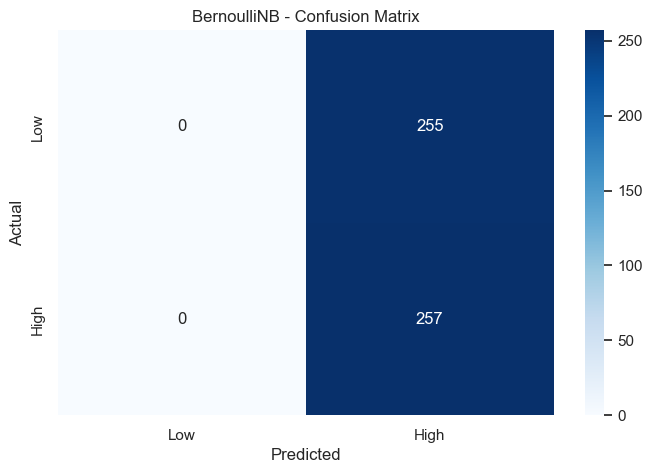


Naive Bayes Variants Summary:


,Accuracy,Precision,Recall,F1,ROC_AUC,TrainTime(s)
Model,,,,,,
GaussianNB,0.734375,0.737255,0.731518,0.734375,0.782528,0.006
MultinomialNB,0.597656,0.580952,0.712062,0.639860,0.633524,0.008
BernoulliNB,0.501953,0.501953,1.000000,0.668401,0.514000,0.012


In [35]:
# ============================
# Naive Bayes (Gaussian, Multinomial, Bernoulli as in original)
# ============================
print("----- Naive Bayes (Gaussian, Multinomial, Bernoulli) -----")
predictors_nb = [
    'fixed acidity','volatile acidity','citric acid','residual sugar',
    'chlorides','free sulfur dioxide','total sulfur dioxide','density',
    'pH','sulphates','alcohol'
]
X_nb = df[predictors_nb]
y_nb = df['quality_c']
Xtr, Xte, ytr, yte = train_test_split(X_nb, y_nb, test_size=0.4, random_state=42)

# scale for GaussianNB
scaler_nb = StandardScaler()
Xtr_s = scaler_nb.fit_transform(Xtr)
Xte_s = scaler_nb.transform(Xte)

classifiers_nb = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB()
}

results_nb = []
for name, clf_nb in classifiers_nb.items():
    t0 = time.time()
    # For Multinomial/Bernoulli, raw X might be better; we use scaled X for Gaussian, raw for others as original code just fit directly.
    Xfit = Xtr if name != "GaussianNB" else Xtr_s
    Xpred = Xte if name != "GaussianNB" else Xte_s

    clf_nb.fit(Xfit, ytr)
    t_training = time.time() - t0
    y_pred = clf_nb.predict(Xpred)
    y_score = clf_nb.predict_proba(Xpred)[:,1] if hasattr(clf_nb, "predict_proba") else None

    metrics_nb = compute_metrics(yte, y_pred, y_score)
    metrics_nb["Model"] = name
    metrics_nb["TrainTime(s)"] = round(t_training,3)
    results_nb.append(metrics_nb)

    # Confusion matrix
    print(f"\n-- {name} --")
    print(tabulate(pd.DataFrame(list(metrics_nb.items())[:-1], columns=["Metric","Value"]), tablefmt="pretty", headers="keys"))
    print("\nClassification Report:\n", classification_report(yte, y_pred, zero_division=0))
    cm = confusion_matrix(yte, y_pred)
    plot_confusion(cm, title=f"{name} - Confusion Matrix")

# Summary table for Naive Bayes variants
nb_df = pd.DataFrame(results_nb).set_index("Model")
print("\nNaive Bayes Variants Summary:")
display(nb_df)


----- Random Forest -----
+---+--------------+--------------------+
|   |    Metric    |       Value        |
+---+--------------+--------------------+
| 0 |   Accuracy   |     0.79296875     |
| 1 |  Precision   | 0.8007968127490039 |
| 2 |    Recall    | 0.7821011673151751 |
| 3 |      F1      | 0.7913385826771654 |
| 4 |   ROC_AUC    | 0.8537651636530098 |
| 5 | TrainTime(s) |       0.071        |
+---+--------------+--------------------+

Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       255
           1       0.80      0.78      0.79       257

    accuracy                           0.79       512
   macro avg       0.79      0.79      0.79       512
weighted avg       0.79      0.79      0.79       512



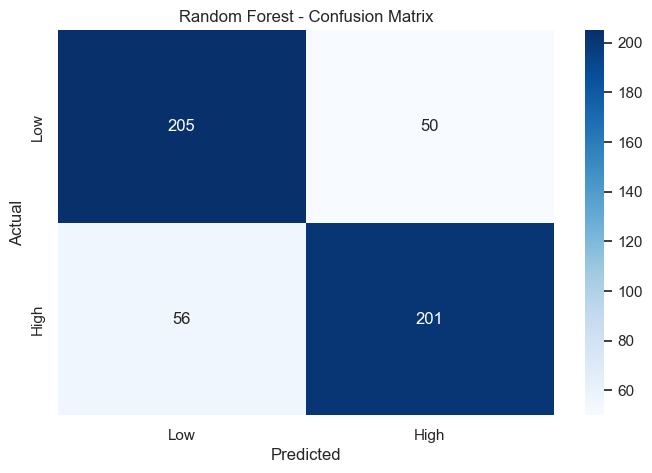

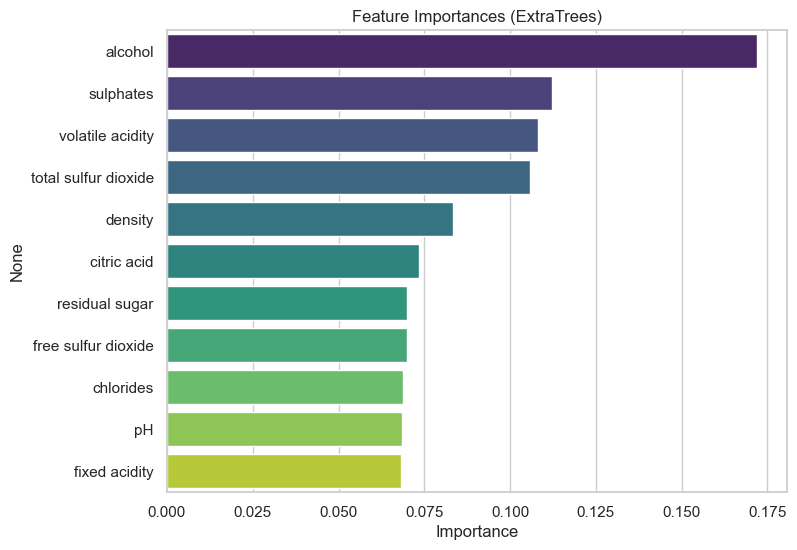


Feature Importances (sorted):
alcohol: 0.1721
sulphates: 0.1121
volatile acidity: 0.1082
total sulfur dioxide: 0.1057
density: 0.0832
citric acid: 0.0733
residual sugar: 0.0701
free sulfur dioxide: 0.0701
chlorides: 0.0687
pH: 0.0685
fixed acidity: 0.0682


In [36]:
# ============================
# Random Forest (full predictors + ExtraTrees for feature importance)
# ============================
print("----- Random Forest -----")
predictors_rf = [
    'fixed acidity','volatile acidity','citric acid','residual sugar',
    'chlorides','free sulfur dioxide','total sulfur dioxide','density',
    'pH','sulphates','alcohol'
]
X_rf = df[predictors_rf]
y_rf = df['quality_c']
Xtr, Xte, ytr, yte = train_test_split(X_rf, y_rf, test_size=0.4, random_state=42)

clf_rf = RandomForestClassifier(n_estimators=25, random_state=42)  # match original n_estimators=25
t0 = time.time()
clf_rf.fit(Xtr, ytr)
t_training = time.time() - t0

y_pred = clf_rf.predict(Xte)
y_score = clf_rf.predict_proba(Xte)[:,1]

metrics_rf = compute_metrics(yte, y_pred, y_score)
metrics_rf["TrainTime(s)"] = round(t_training,3)
print(tabulate(pd.DataFrame(list(metrics_rf.items()), columns=["Metric","Value"]), tablefmt="pretty", headers="keys"))
print("\nClassification Report:\n")
print(classification_report(yte, y_pred, zero_division=0))

cm = confusion_matrix(yte, y_pred)
plot_confusion(cm, title="Random Forest - Confusion Matrix")

# Use ExtraTreesClassifier for feature importance (as in original code)
et = ExtraTreesClassifier(random_state=42)
et.fit(Xtr, ytr)
importances = et.feature_importances_
fi = pd.Series(importances, index=predictors_rf).sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=fi.values, y=fi.index, palette='viridis')
plt.title("Feature Importances (ExtraTrees)")
plt.xlabel("Importance")
plt.show()

print("\nFeature Importances (sorted):")
for feature, imp in fi.items():
    print(f"{feature}: {imp:.4f}")


In [37]:
# ============================
# Consolidate metrics into one comparison table
# ============================

records = []

# Add logistic
rec = metrics_lr.copy(); rec["Model"]="LogisticRegression"; records.append(rec)
rec = metrics_dt.copy(); rec["Model"]="DecisionTree"; records.append(rec)
rec = metrics_knn.copy(); rec["Model"]="KNN"; records.append(rec)
rec = metrics_rf.copy(); rec["Model"]="RandomForest"; records.append(rec)

# Naive Bayes variants
for idx, row in nb_df.reset_index().iterrows():
    r = row.to_dict()
    # ensure consistent column names as in others
    r_clean = {
        "Model": r.get("Model"),
        "Accuracy": r.get("Accuracy"),
        "Precision": r.get("Precision"),
        "Recall": r.get("Recall"),
        "F1": r.get("F1"),
        "ROC_AUC": r.get("ROC_AUC"),
        "TrainTime(s)": r.get("TrainTime(s)")
    }
    records.append(r_clean)

# Final table
comp_df = pd.DataFrame(records)
# Reorder columns
cols = ["Model","Accuracy","Precision","Recall","F1","ROC_AUC","TrainTime(s)"]
comp_df = comp_df[cols].sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
print("==== Model Comparison ====")
display(comp_df)


==== Model Comparison ====


,Model,Accuracy,Precision,Recall,F1,ROC_AUC,TrainTime(s)
0,RandomForest,0.792969,0.800797,0.782101,0.791339,0.853765,0.071
1,GaussianNB,0.734375,0.737255,0.731518,0.734375,0.782528,0.006
2,LogisticRegression,0.716797,0.733333,0.684825,0.708249,0.797505,0.036
3,DecisionTree,0.656250,0.680000,0.595331,0.634855,0.675937,0.018
4,KNN,0.646484,0.658333,0.614786,0.635815,0.726429,0.012
5,MultinomialNB,0.597656,0.580952,0.712062,0.639860,0.633524,0.008
6,BernoulliNB,0.501953,0.501953,1.000000,0.668401,0.514000,0.012


----- Linear Regression (original recode used in basic_linear) -----
+---+--------------+-------------+
|   |    Metric    |    Value    |
+---+--------------+-------------+
| 0 |   Accuracy   |    0.875    |
| 1 |  Precision   |     0.0     |
| 2 |    Recall    |     0.0     |
| 3 |      F1      |     0.0     |
| 4 |   ROC_AUC    | 0.736328125 |
| 5 | TrainTime(s) |    0.01     |
+---+--------------+-------------+

Classification Report:

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       448
           1       0.00      0.00      0.00        64

    accuracy                           0.88       512
   macro avg       0.44      0.50      0.47       512
weighted avg       0.77      0.88      0.82       512



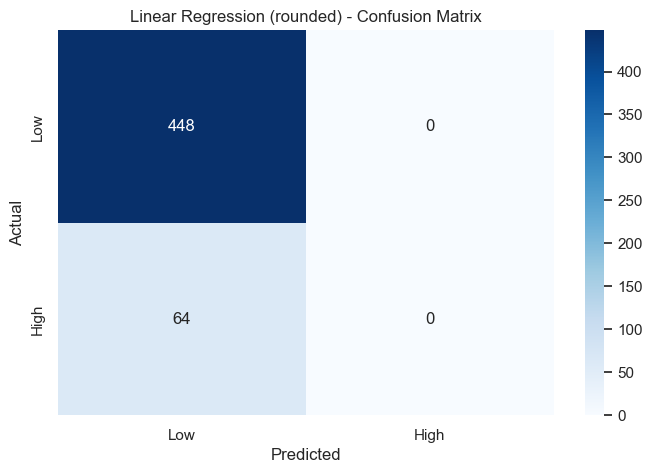

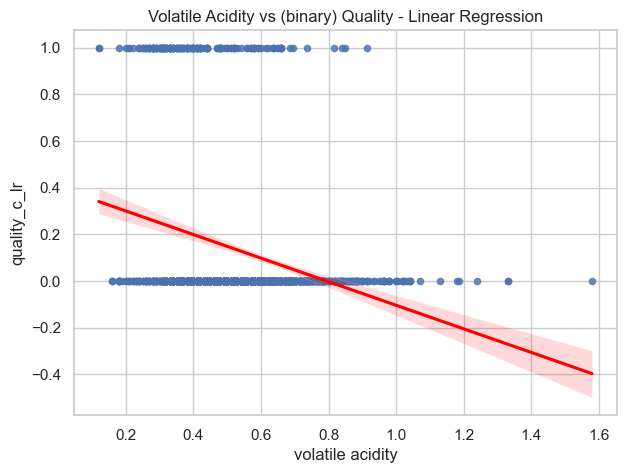

In [38]:
# ============================
# Linear Regression (original mapping used in their basic_linear)
# ============================
print("----- Linear Regression (original recode used in basic_linear) -----")
df_lr = wine_train_df.copy()
recode_lr = {3:0,4:0,5:0,6:0,7:1,8:1,9:1}  # original function used this mapping
df_lr['quality_c_lr'] = df_lr['quality'].map(recode_lr)

X_lr = df_lr[["volatile acidity"]]
y_lr = df_lr["quality_c_lr"]

Xtr, Xte, ytr, yte = train_test_split(X_lr, y_lr, test_size=0.4, random_state=42)
model_lr = LinearRegression()
t0 = time.time()
model_lr.fit(Xtr, ytr)
t_training = time.time() - t0

y_pred_cont = model_lr.predict(Xte)
y_pred = [int(round(x)) for x in y_pred_cont]  # convert to 0/1 like original

metrics_lin = compute_metrics(yte, y_pred, y_pred_cont)
metrics_lin["TrainTime(s)"] = round(t_training,3)
print(tabulate(pd.DataFrame(list(metrics_lin.items()), columns=["Metric","Value"]), tablefmt="pretty", headers="keys"))
print("\nClassification Report:\n")
print(classification_report(yte, y_pred, zero_division=0))

cm = confusion_matrix(yte, y_pred)
plot_confusion(cm, title="Linear Regression (rounded) - Confusion Matrix")

# Regression scatter/regplot (like original)
plt.figure(figsize=(7,5))
sns.regplot(x="volatile acidity", y="quality_c_lr", data=df_lr, scatter_kws={'s':20}, line_kws={'color':'red'})
plt.title("Volatile Acidity vs (binary) Quality - Linear Regression")
plt.show()


----- Random Forest: accuracy vs number of trees -----


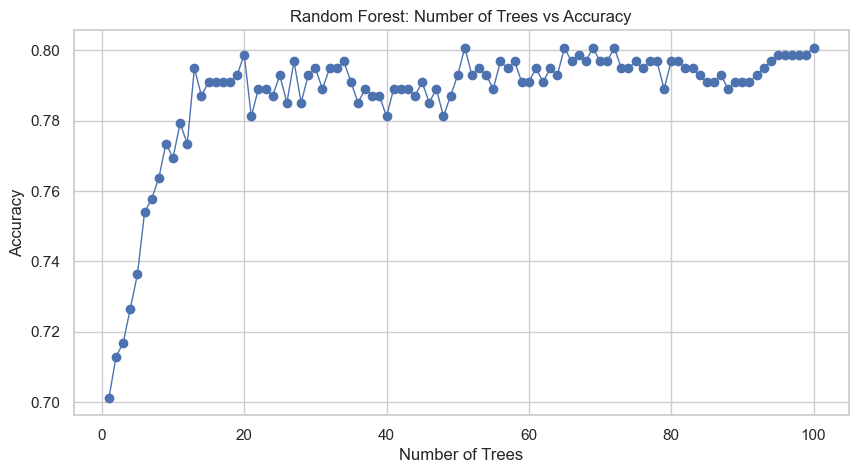

First 10 accuracies:
Trees=1: Accuracy=0.7012
Trees=2: Accuracy=0.7129
Trees=3: Accuracy=0.7168
Trees=4: Accuracy=0.7266
Trees=5: Accuracy=0.7363
Trees=6: Accuracy=0.7539
Trees=7: Accuracy=0.7578
Trees=8: Accuracy=0.7637
Trees=9: Accuracy=0.7734
Trees=10: Accuracy=0.7695


In [39]:
# ============================
# Random Forest - effect of number of trees (separate experiment)
# ============================

print("----- Random Forest: accuracy vs number of trees -----")
X_rf = df[predictors_rf]
y_rf = df['quality_c']
Xtr, Xte, ytr, yte = train_test_split(X_rf, y_rf, test_size=0.4, random_state=42)

n_trees = 100
accuracies = []
for n in range(1, n_trees+1):
    rf_temp = RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1)
    rf_temp.fit(Xtr, ytr)
    ypred_temp = rf_temp.predict(Xte)
    accuracies.append(accuracy_score(yte, ypred_temp))

# Plot
plt.figure(figsize=(10,5))
plt.plot(range(1, n_trees+1), accuracies, marker='o', linewidth=1)
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.title("Random Forest: Number of Trees vs Accuracy")
plt.grid(True)
plt.show()

# Print first 10
print("First 10 accuracies:")
for i in range(10):
    print(f"Trees={i+1}: Accuracy={accuracies[i]:.4f}")
